# Task_2: Cat and Dog Image Classifier

## Author: Bandana Prakash

### Batch :June

### Domain: Data Science

**Task :** We are developing image classification model to distinguish between images of cats and dogs.In this model I've taken a sample dataset from kaggle that contains different images of cats and dogs in two separate folders.

## **Libraries used :**

Pandas – This library is used to load 2D array format and DataFrames.

Numpy – Numpy library is used to perform large computations in a easier way.

Matplotlib – Matplotlib library is used to visualize the predictions and models.

Sklearn – Scikit-learn also known as Sklearn library is used to perform tasks from data preprocessing to model development and evaluation.

OpenCV – This OpenCV library is an open-source library mainly focused on image processing and handling.

Tensorflow – This is an open-source library that is used to achieve complex functionalities with single lines of code.




In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import image_dataset_from_directory
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.preprocessing import image_dataset_from_directory

import os
import matplotlib.image as mpimg


ImportError: cannot import name 'load_img' from 'keras.preprocessing.image' (/opt/anaconda3/envs/tff/lib/python3.11/site-packages/keras/preprocessing/image.py)

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
path ='/content/dogs_vs_cats'
classes = os.listdir(path)
classes

['train', 'test']

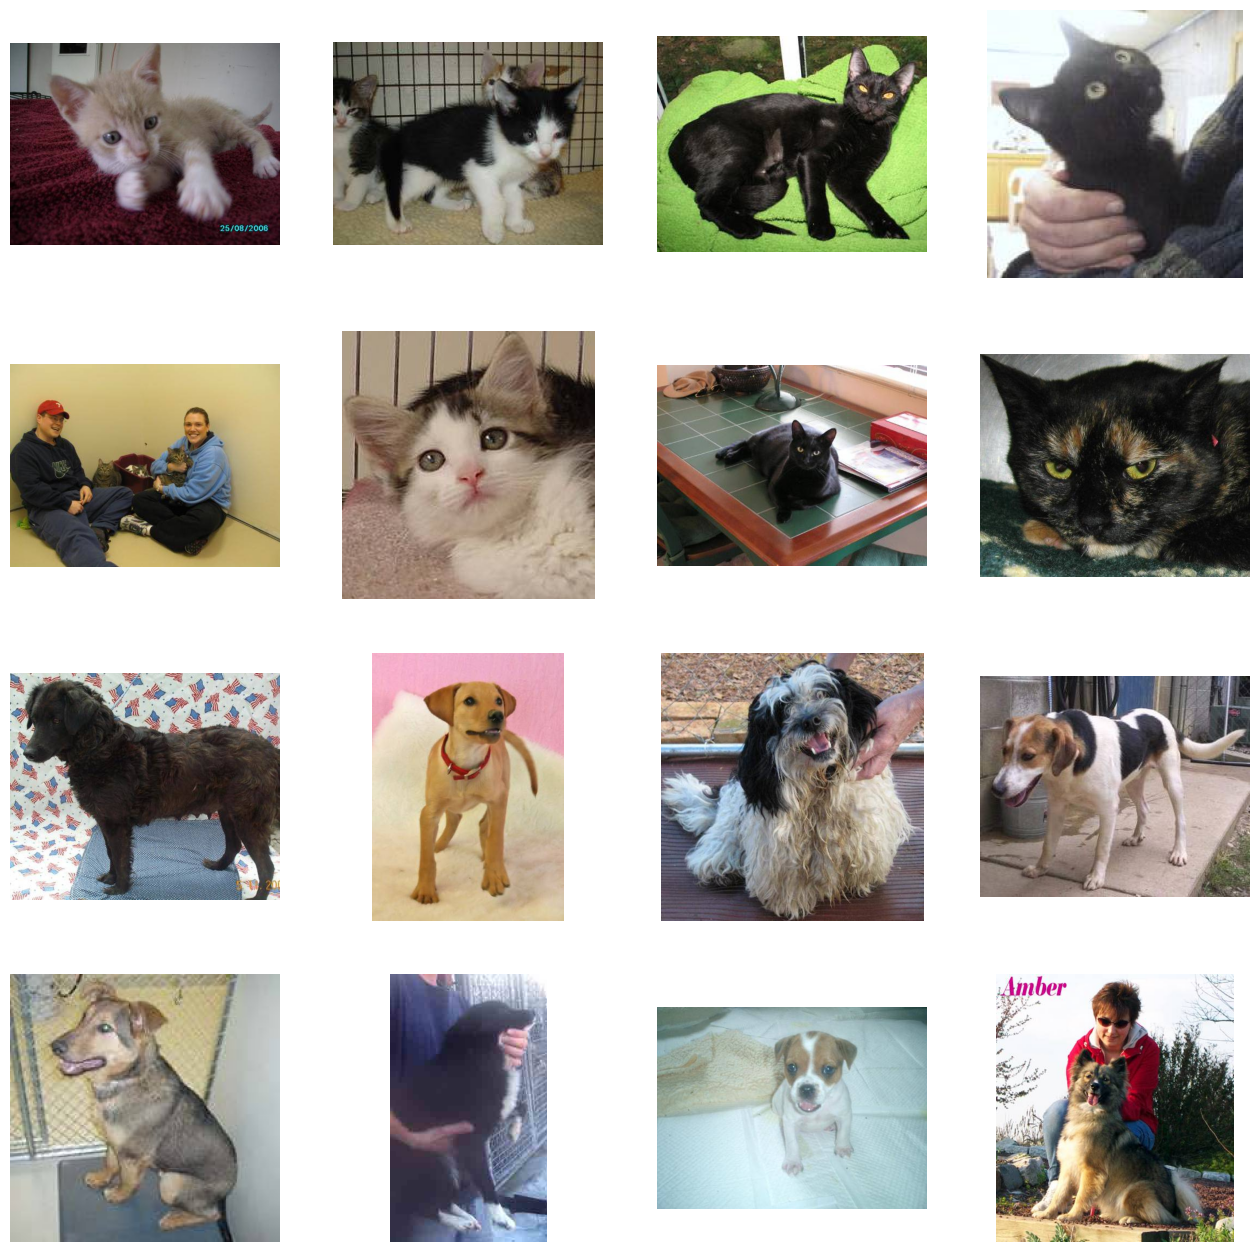

In [ ]:
fig = plt.gcf()
fig.set_size_inches(16, 16)

cat_dir = os.path.join('/content/dogs_vs_cats/test/cats')
dog_dir = os.path.join('/content/dogs_vs_cats/test/dogs')
cat_names = os.listdir(cat_dir)
dog_names = os.listdir(dog_dir)

pic_index = 210

cat_images = [os.path.join(cat_dir, fname)
			for fname in cat_names[pic_index-8:pic_index]]
dog_images = [os.path.join(dog_dir, fname)
			for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(cat_images + dog_images):
	sp = plt.subplot(4, 4, i+1)
	sp.axis('Off')

	img = mpimg.imread(img_path)
	plt.imshow(img)

plt.show()

In [ ]:
base_dir = '/content/dogs_vs_cats'

# Create datasets
train_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='training',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)
test_datagen = image_dataset_from_directory(base_dir,
												image_size=(200,200),
												subset='validation',
												seed = 1,
												validation_split=0.1,
												batch_size= 32)


Found 25000 files belonging to 2 classes.
Using 22500 files for training.
Found 25000 files belonging to 2 classes.
Using 2500 files for validation.


In [ ]:
model = tf.keras.models.Sequential([
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),
	layers.Conv2D(64, (3, 3), activation='relu'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(512, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.1),
	layers.BatchNormalization(),
	layers.Dense(512, activation='relu'),
	layers.Dropout(0.2),
	layers.BatchNormalization(),
	layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 99, 99, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 48, 48, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 23, 23, 64)       

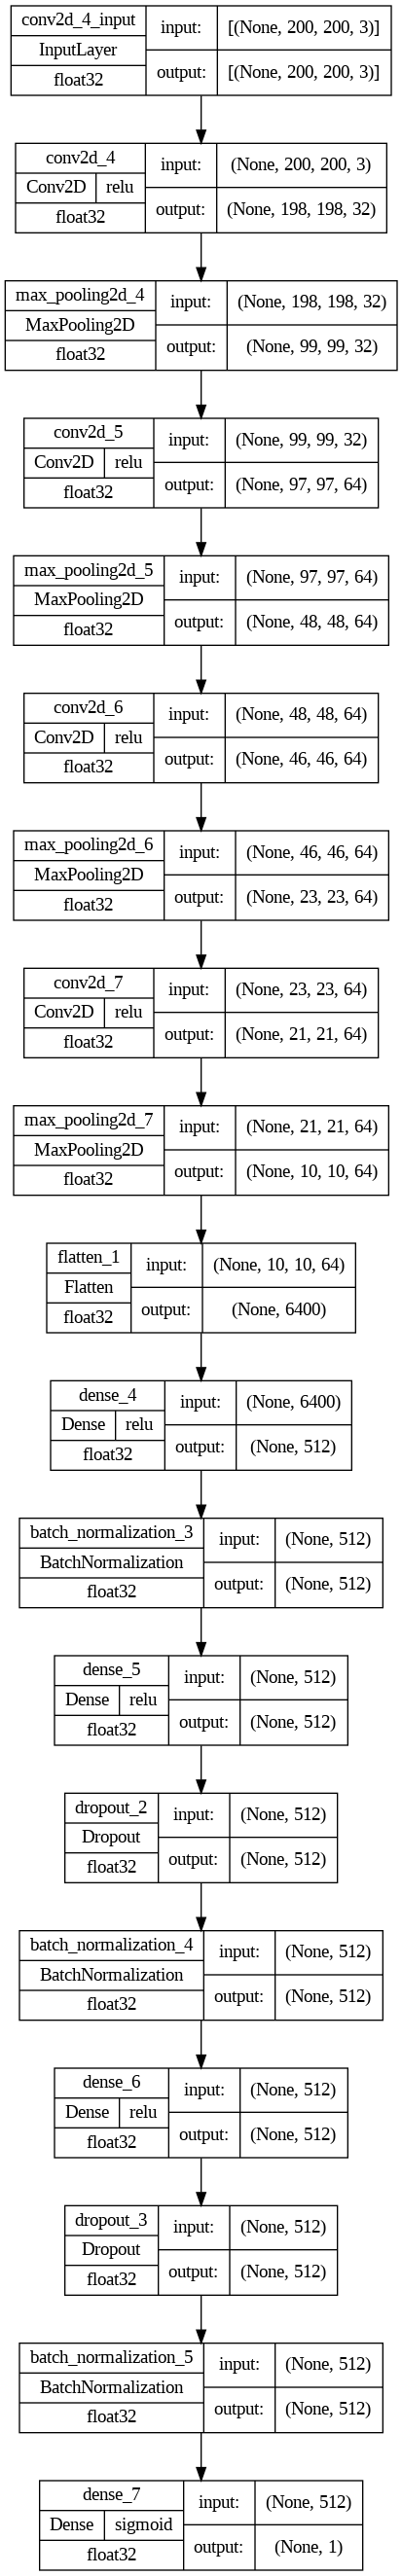

In [ ]:
keras.utils.plot_model(
	model,
	show_shapes=True,
	show_dtype=True,
	show_layer_activations=True
)

In [ ]:
model.compile(
	loss='binary_crossentropy',
	optimizer='adam',
	metrics=['accuracy']
)

In [ ]:
history = model.fit(train_datagen,
		epochs=10,
		validation_data=test_datagen)

Epoch 1/10
704/704 [==============================] - 1656s 2s/step - loss: 0.5603 - accuracy: 0.7721 - val_loss: 0.5330 - val_accuracy: 0.7924
Epoch 2/10
704/704 [==============================] - 1617s 2s/step - loss: 0.5225 - accuracy: 0.7944 - val_loss: 0.5342 - val_accuracy: 0.7924
Epoch 3/10
704/704 [==============================] - 1590s 2s/step - loss: 0.5152 - accuracy: 0.7975 - val_loss: 0.6463 - val_accuracy: 0.6476
Epoch 4/10
704/704 [==============================] - 1589s 2s/step - loss: 0.5116 - accuracy: 0.7978 - val_loss: 0.5198 - val_accuracy: 0.7904
Epoch 5/10
704/704 [==============================] - 1583s 2s/step - loss: 0.5110 - accuracy: 0.7994 - val_loss: 0.5164 - val_accuracy: 0.7924
Epoch 6/10
704/704 [==============================] - 1581s 2s/step - loss: 0.5102 - accuracy: 0.7997 - val_loss: 0.5160 - val_accuracy: 0.7916
Epoch 7/10
704/704 [==============================] - 1555s 2s/step - loss: 0.5074 - accuracy: 0.8003 - val_loss: 0.5160 - val_accuracy:

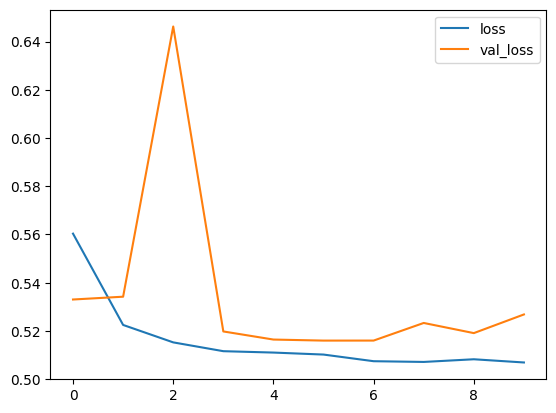

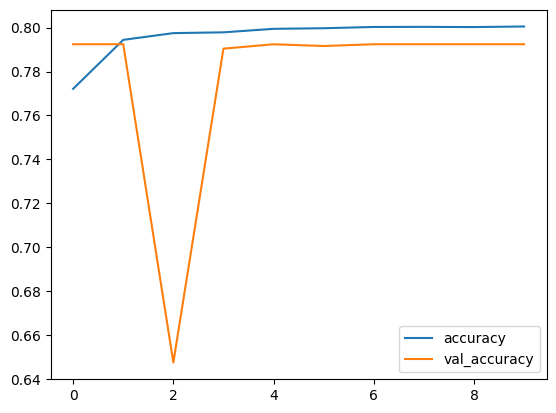

In [ ]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
plt.show()

1/1 [==============================] - 0s 183ms/step
Cat


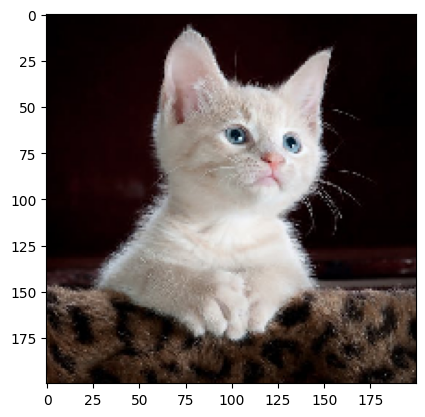

In [ ]:
from keras.preprocessing import image

#Input image
test_image = image.load_img('cat.jpeg',target_size=(200,200))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = model.predict(test_image)

#Mapping result array with the main name list
i=0
if(result>=1):
   print("Dog")
else:
   print("Cat")


1/1 [==============================] - 0s 54ms/step
Cat


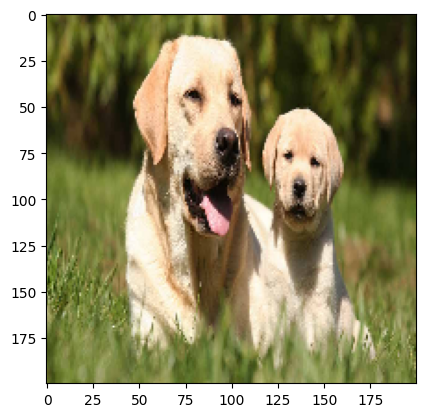

In [ ]:
test_image = image.load_img('dogg.jpg', target_size=(200, 200))

# For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Result array
result = model.predict(test_image)
# Mapping result array with the main name list
i = 0
if(result >= 0.5):
	print("Dog")
else:
	print("Cat")
